# A study on Grid Trading 

Assume that 
- the price follows GBM with 0 dirft 

We solve:
1. The expected profit of the Grid Trading strategy -> = 0?

In [1]:
from price_dynamic import *
from grid_trading import *
import matplotlib.pyplot as plt

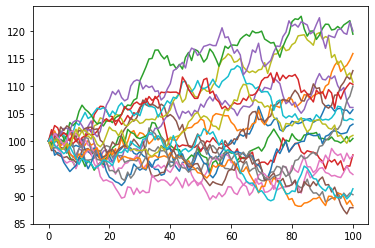

In [2]:
# Price dynamic 
X = geometric_brownien_motion(inputs)

# Plot
plt.figure()
for i in range(20):
    plt.plot(X[i,:])


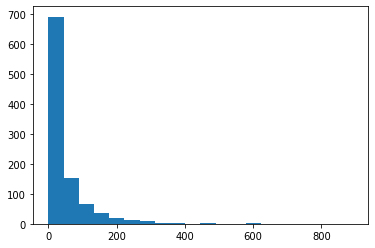

In [8]:
# Calculate the loss in the end 
end_price = X[:, -1]
losses = get_grid_loss_v4(start_price, end_price, r)

# for i in range(10):
#     print(get_grid_loss_v3(start_price, end_price[i], r), losses[i])

fg1 = plt.hist(losses, bins=20)


In [ ]:
# Calculate profit in the end 